### 1. Load libraries

In [171]:
# import packages
import pandas as pd
import datetime as dt
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

%matplotlib inline

### 2. Load data

In [172]:
# Download data from the period 2010-2020 
all_files = glob.glob("./data/datos*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, header=0, sep=';')
    dfs.append(df)

df = pd.concat(dfs, axis=0, ignore_index=True)

In [173]:
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2017,1,6.0,V,8.0,...,5.0,V,4.0,V,4.0,V,5.0,V,7.0,V
1,28,79,4,1,28079004_1_38,2017,2,8.0,V,4.0,...,4.0,V,4.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2017,3,5.0,V,7.0,...,4.0,V,5.0,V,7.0,V,7.0,V,5.0,V
3,28,79,4,1,28079004_1_38,2017,4,4.0,V,4.0,...,3.0,V,4.0,V,4.0,V,4.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2017,5,4.0,V,5.0,...,5.0,V,5.0,V,4.0,V,4.0,V,5.0,V


In [174]:
# Lower column names
df.columns = map(str.lower, df.columns)

### 3. Data cleansing

In [175]:
# Select columns with daily values
days= df.filter(regex=("^d.*$"))
days.head()

,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,6.0,8.0,12.0,9.0,7.0,10.0,10.0,11.0,10.0,12.0,...,7.0,9.0,12.0,9.0,9.0,5.0,4.0,4.0,5.0,7.0
1,8.0,4.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0,8.0,...,12.0,11.0,6.0,6.0,5.0,4.0,4.0,0.0,0.0,0.0
2,5.0,7.0,5.0,3.0,3.0,4.0,6.0,9.0,10.0,10.0,...,4.0,3.0,4.0,4.0,4.0,4.0,5.0,7.0,7.0,5.0
3,4.0,4.0,5.0,7.0,4.0,4.0,5.0,5.0,5.0,6.0,...,5.0,5.0,6.0,4.0,4.0,3.0,4.0,4.0,4.0,0.0
4,4.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0


In [176]:
# Select columns with data validity
validity = df.filter(regex=("^v.*$"))
validity.head()

,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,V,V,V
1,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,N,N,N
2,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,V,V,V
3,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,V,V,N
4,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,V,V,V


In [177]:
# Convert V in null values
validity = validity.replace('V', np.nan)

In [178]:
# Change column names in validty and use 'days' column names
validity.columns = days.columns

In [179]:
# Use combine_first to get valid data
valid_data= validity.combine_first(days)

In [180]:
# Replace 'N' values for np.nan
valid_data= valid_data.replace('N', np.nan)

valid_data.head()

,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,6.0,8.0,12.0,9.0,7.0,10.0,10.0,11.0,10.0,12.0,...,7.0,9.0,12.0,9.0,9.0,5.0,4.0,4.0,5.0,7.0
1,8.0,4.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0,8.0,...,12.0,11.0,6.0,6.0,5.0,4.0,4.0,NaN,NaN,NaN
2,5.0,7.0,5.0,3.0,3.0,4.0,6.0,9.0,10.0,10.0,...,4.0,3.0,4.0,4.0,4.0,4.0,5.0,7.0,7.0,5.0
3,4.0,4.0,5.0,7.0,4.0,4.0,5.0,5.0,5.0,6.0,...,5.0,5.0,6.0,4.0,4.0,3.0,4.0,4.0,4.0,NaN
4,4.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0


In [181]:
cols = valid_data.columns

In [182]:
# Create a new dataframe concatenating columns from df_match_no2 and valid measurements
df_valid = pd.concat([df[['estacion', 'magnitud', 'ano','mes']], valid_data], axis=1)

df_valid.head()

,estacion,magnitud,ano,mes,d01,d02,d03,d04,d05,d06,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,4,1,2017,1,6.0,8.0,12.0,9.0,7.0,10.0,...,7.0,9.0,12.0,9.0,9.0,5.0,4.0,4.0,5.0,7.0
1,4,1,2017,2,8.0,4.0,3.0,3.0,3.0,4.0,...,12.0,11.0,6.0,6.0,5.0,4.0,4.0,NaN,NaN,NaN
2,4,1,2017,3,5.0,7.0,5.0,3.0,3.0,4.0,...,4.0,3.0,4.0,4.0,4.0,4.0,5.0,7.0,7.0,5.0
3,4,1,2017,4,4.0,4.0,5.0,7.0,4.0,4.0,...,5.0,5.0,6.0,4.0,4.0,3.0,4.0,4.0,4.0,NaN
4,4,1,2017,5,4.0,5.0,5.0,6.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0


In [183]:
# Use melt to create a column 'day'
df_valid = pd.melt(df_valid,id_vars= ['estacion','magnitud','ano','mes'], value_vars =cols,
                             var_name ='dia', value_name ='medicion')
                                                           
df_valid.head()

,estacion,magnitud,ano,mes,dia,medicion
0,4,1,2017,1,d01,6.0
1,4,1,2017,2,d01,8.0
2,4,1,2017,3,d01,5.0
3,4,1,2017,4,d01,4.0
4,4,1,2017,5,d01,4.0


In [184]:
# Drop rows with NULL values
df_valid = df_valid.dropna()

In [185]:
# Remove 'd' from column 'day'
df_valid['dia'] = df_valid['dia'].str.replace('d', '')

In [186]:
# Create a new column 'date' joining year, month and day
df_valid['fecha'] = (df_valid['ano'].map(str) + "-" + df_valid['mes'].map(str) + "-" 
                                                             + df_valid['dia'].map(str))

In [187]:
# Convert 'date' to datetime
df_valid['fecha'] = pd.to_datetime(df_valid['fecha'], format='%Y-%m-%d')

df_valid.head()

,estacion,magnitud,ano,mes,dia,medicion,fecha
0,4,1,2017,1,01,6.0,2017-01-01
1,4,1,2017,2,01,8.0,2017-02-01
2,4,1,2017,3,01,5.0,2017-03-01
3,4,1,2017,4,01,4.0,2017-04-01
4,4,1,2017,5,01,4.0,2017-05-01


In [161]:
# Drop columns 'year','month','day'
df_valid.drop(columns=['ano', 'mes', 'dia'], inplace=True)

df_valid.head()

,estacion,magnitud,medicion,fecha
0,4,1,6.0,2017-01-01
1,4,1,8.0,2017-02-01
2,4,1,5.0,2017-03-01
3,4,1,4.0,2017-04-01
4,4,1,4.0,2017-05-01


In [165]:
df_valid_no_background = df_valid[(df_valid.estacion != 58) & (df_valid.estacion !=24)]

In [166]:
# Use grouby to calculate daily average emission by date and particle.
df_avg_emissions = pd.DataFrame(df_valid_no_background.groupby(['fecha', 'magnitud'])
                                ['medicion']
                                .mean().reset_index())


In [167]:
# Use pivot to turn every particle in a column
df_avg_emissions = pd.pivot(df_avg_emissions, index= 'fecha', columns='magnitud',values='medicion')

In [168]:
# Create list with name of particles and rename columns
particles = ['so2', 'co','no','no2','pm2_5','pm10','nox','o3','tol','ben','ebe','tch','ch4','nmhc']

df_avg_emissions.columns = particles


In [169]:
# Convetir index to datetime

df_avg_emissions.index = pd.to_datetime(df_avg_emissions.index)

In [170]:
df_avg_emissions

,so2,co,no,no2,pm2_5,pm10,nox,o3,tol,ben,ebe,tch,ch4,nmhc
fecha,,,,,,,,,,,,,,
2010-01-01,8.000000,0.275000,7.647059,22.058824,7.666667,10.714286,33.823529,56.700000,1.750,0.575000,1.000,1.330,1.205,0.125
2010-01-02,9.777778,0.400000,22.235294,44.235294,10.666667,15.857143,78.176471,26.000000,3.675,1.000000,1.100,1.415,1.275,0.140
2010-01-03,12.000000,0.525000,39.823529,55.647059,12.666667,16.714286,116.882353,12.500000,6.950,1.550000,1.825,1.510,1.365,0.145
2010-01-04,12.000000,0.487500,33.176471,55.823529,9.000000,9.571429,106.529412,12.800000,5.750,1.375000,2.125,1.465,1.325,0.145
2010-01-05,12.333333,0.412500,24.529412,50.235294,8.666667,12.714286,87.882353,21.700000,4.500,0.766667,1.900,1.425,1.290,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,4.875000,0.200000,2.238095,6.428571,8.000000,13.666667,10.095238,65.416667,0.380,0.200000,0.200,1.345,1.255,0.085
2020-04-27,4.750000,0.200000,2.857143,9.714286,5.666667,9.333333,13.904762,76.833333,0.300,0.140000,0.140,1.295,1.195,0.095
2020-04-28,4.875000,0.200000,3.238095,10.952381,5.000000,7.000000,15.857143,67.250000,0.360,0.160000,0.160,1.310,1.205,0.105


### 4. Exploratory Data analysis

In [31]:
df_avg_emissions.describe()

,so2,co,no,no2,pm2_5,pm10,nox,o3,tol,ben,ebe,tch,ch4,nmhc
count,3773.000000,3773.000000,3773.000000,3773.000000,3771.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3765.000000,3765.000000,3765.000000
mean,6.980857,0.368197,23.502338,40.404743,11.154932,20.398133,76.432983,47.354693,2.993781,0.715563,0.690861,1.474137,1.294149,0.181197
std,2.995626,0.147052,28.563770,17.907821,5.508382,11.972461,59.779065,22.417276,2.069540,0.454574,0.531010,0.159554,0.145238,0.110357
min,1.666667,0.144444,1.636364,6.428571,2.400000,2.636364,9.952381,2.333333,0.200000,0.120000,0.100000,0.950000,0.720000,0.020000
25%,4.875000,0.266667,7.000000,27.136364,7.400000,12.454545,38.181818,30.083333,1.580000,0.400000,0.300000,1.360000,1.200000,0.115000
50%,6.500000,0.322222,11.909091,37.285714,10.166667,18.250000,56.272727,49.166667,2.500000,0.600000,0.600000,1.440000,1.280000,0.160000
75%,8.666667,0.422222,26.363636,50.772727,13.800000,25.363636,91.227273,64.750000,3.750000,0.880000,0.880000,1.560000,1.385000,0.210000
max,19.333333,1.222222,220.954545,111.190476,59.800000,219.545455,435.772727,109.833333,16.300000,3.200000,4.120000,2.580000,2.260000,0.910000


In [ ]:
# Pairplot to see the correlation between pollutants
sns.pairplot(df_avg_emissions, 
             vars=df_avg_emissions.columns,
             height=4.
             )
pass

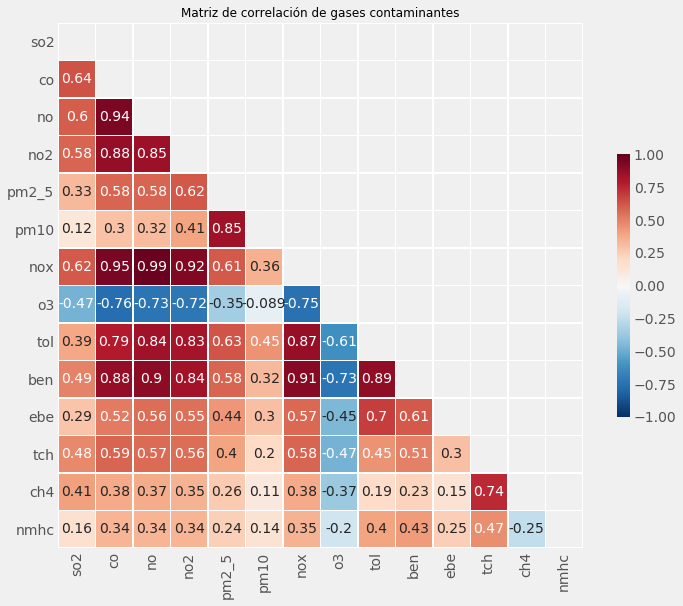

In [613]:
# Heatmap to see correlation coefficient between variables. Most of the pairs of variables have a positive 
# correlation. The only exception is ozone (O3), which is negatively correlated with the rest of the 
# particles, meaning that its value decreases when other particles values increase.

# Compute the correlation matrix
corr = df_avg_emissions.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = 'RdBu_r'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Matriz de correlación de gases contaminantes', fontsize = 12)

pass;

In [614]:
# NO2 values have a strong positive correlation with other gases, such Nitrogen oxides (NOx), 
# Carbon monoxide (CO), nitric oxide (NO) or benzene (BEN)
corr_matrix = df_avg_emissions.corr()
print('Correlation between NO2 and other gases:\n')
print(corr_matrix["no2"].sort_values(ascending=False))

Correlation between NO2 and other gases:

no2      1.000000
nox      0.923245
co       0.881622
no       0.852096
ben      0.841299
tol      0.831042
pm2_5    0.622245
so2      0.584296
tch      0.555935
ebe      0.554628
pm10     0.405699
ch4      0.350659
nmhc     0.343705
o3      -0.724427
Name: no2, dtype: float64


### 5. Data visualisation

# 5.1. Daily emissions in March and april 2020

In [33]:
# Emissions in March 2020
emissions_march_april_2020 = df_avg_emissions[(df_avg_emissions.index.month >=3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [34]:
emissions_march_april_2020.index = pd.to_datetime(emissions_march_april_2020.index)

In [35]:
emissions_march_april_2020 = emissions_march_april_2020.groupby([emissions_march_april_2020.index.month,
                                                           emissions_march_april_2020.index.day]).mean()

In [36]:
emissions_march_april_2020.index = emissions_march_april_2020.index.droplevel()


In [37]:
emissions_march_april_2020.reset_index(inplace=True)

In [38]:
emissions_march_april_2020.index += 1 

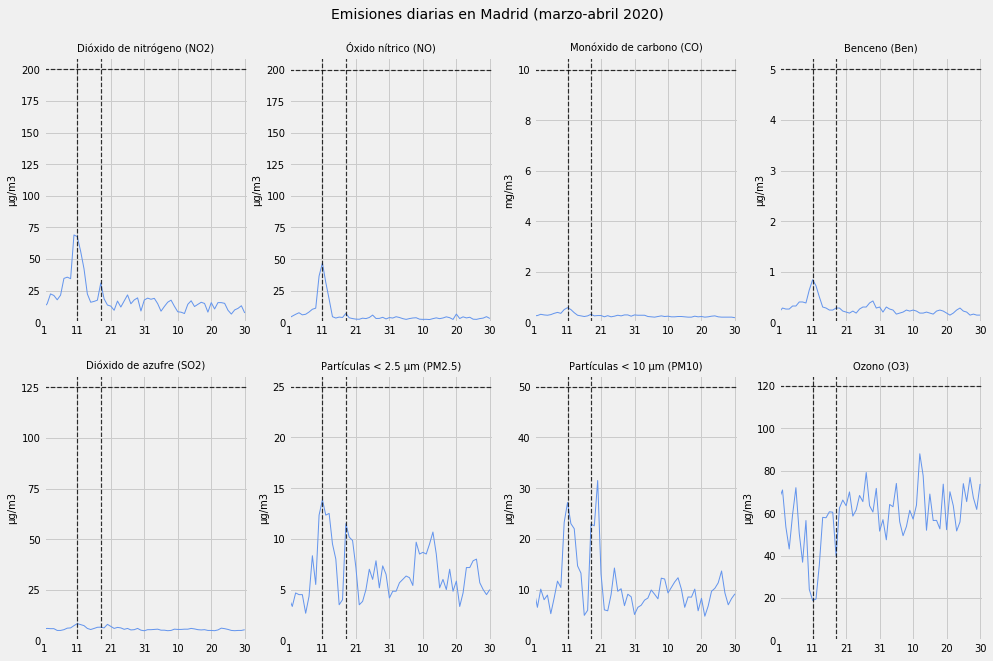

In [42]:
f, axes = plt.subplots(2, 4, figsize=(15, 10))

f.suptitle('Emisiones diarias en Madrid (marzo-abril 2020)', y=0.95,fontsize=14)

sns.lineplot(x=emissions_march_april_2020.index, y="no2", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 0])
axes[0,0].set_title("Dióxido de nitrógeno (NO2)", fontsize=10)
plt.sca(axes[0,0])
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11, alpha=0.8, linestyle='dashed', color = 'black', linewidth=1.2)
plt.axvline(x=18, alpha=0.8, linestyle='dashed',color = 'black',linewidth=1.2)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="no", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 1])
plt.sca(axes[0,1])
axes[0,1].set_title("Óxido nítrico (NO)", fontsize=10)
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="co", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 2])
axes[0,2].set_title("Monóxido de carbono (CO)", fontsize=10)
plt.sca(axes[0,2])
plt.xlabel('')
plt.ylabel("mg/m3", fontsize=10)
plt.axhline(y=10, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="ben", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[0,3])
axes[0,3].set_title("Benceno (Ben)", fontsize=10)
plt.sca(axes[0,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=5, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,6, 1)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)

sns.lineplot(x=emissions_march_april_2020.index, y="so2", data=emissions_march_april_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[1,0])
plt.sca(axes[1,0])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,0].set_title("Dióxido de azufre (SO2)", fontsize=10)
plt.axhline(y=125, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,150, 25)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="pm2_5", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 1])
plt.sca(axes[1,1])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,1].set_title("Partículas < 2.5 µm (PM2.5)", fontsize=10)
plt.axhline(y=25, alpha=0.8, color = 'black',linewidth=1.2,linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,26, 5)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="pm10", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1,2])
plt.sca(axes[1,2])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,2].set_title("Partículas < 10 µm (PM10)", fontsize=10)
plt.axhline(y=50, alpha=0.8, color = 'black',linewidth=1.2,linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,51, 10)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


sns.lineplot(x=emissions_march_april_2020.index, y="o3", data=emissions_march_april_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 3])
plt.sca(axes[1,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,3].set_title("Ozono (O3)", fontsize=10)
plt.axhline(y=120, alpha=0.8, color = 'black',linewidth=1.2, linestyle='dashed')
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(np.arange(1,70, 10),['1','11','21','31','10','20','30'], fontsize=10)
plt.yticks(list(range(0,121, 20)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


plt.savefig('subplot.pdf', bbox_inches='tight')
pass;

#### 5.1. Daily emissions in March 2020

In [226]:
# Emissions in March 2020
emissions_march_2020 = df_avg_emissions[(df_avg_emissions.index.month ==3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [227]:
emissions_march_2020 = emissions_march_2020.groupby(emissions_march_2020.index.day).mean()

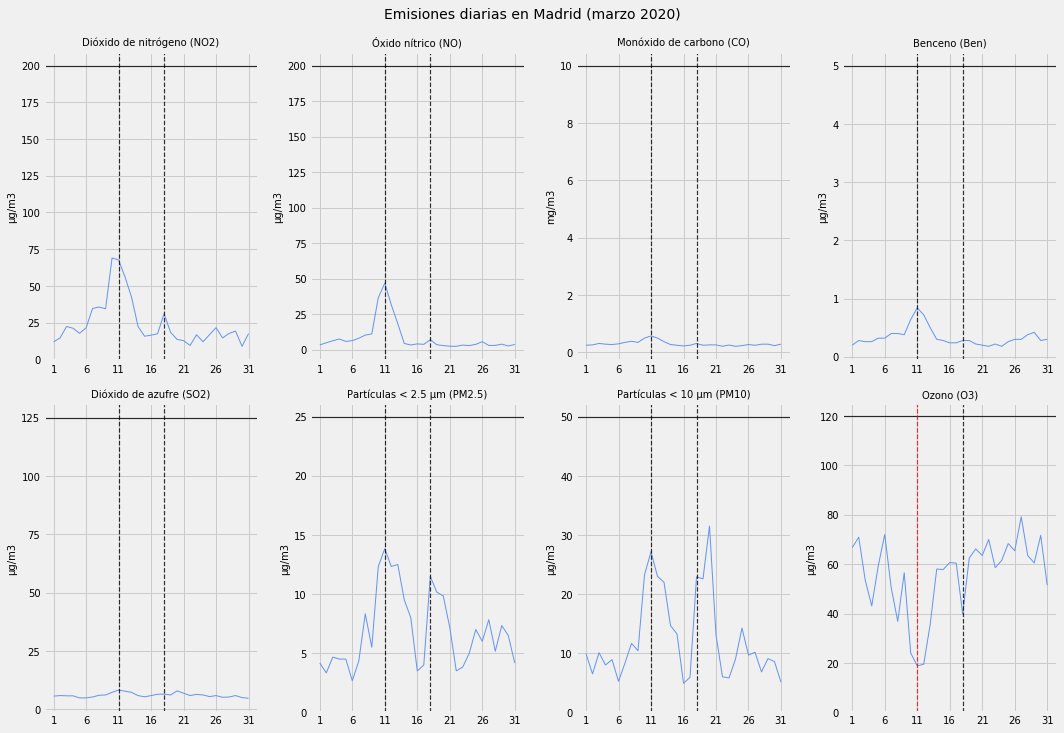

In [228]:
f, axes = plt.subplots(2, 4, figsize=(15, 10))

f.suptitle('Emisiones diarias en Madrid (marzo 2020)', y=1.02,fontsize=14)
sns.lineplot(x=emissions_march_2020.index, y="no2", data=emissions_march_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 0])
axes[0,0].set_title("Dióxido de nitrógeno (NO2)", fontsize=10)
plt.sca(axes[0,0])
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(list(range(1,32, 5)), fontsize=10)


sns.lineplot(x=emissions_march_2020.index, y="no", data=emissions_march_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 1])
plt.sca(axes[0,1])
axes[0,1].set_title("Óxido nítrico (NO)", fontsize=10)
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=200, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)


sns.lineplot(x=emissions_march_2020.index, y="co", data=emissions_march_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[0, 2])
axes[0,2].set_title("Monóxido de carbono (CO)", fontsize=10)
plt.sca(axes[0,2])
plt.xlabel('')
plt.ylabel("mg/m3", fontsize=10)
plt.axhline(y=10, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)

sns.lineplot(x=emissions_march_2020.index, y="ben", data=emissions_march_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[0,3])
axes[0,3].set_title("Benceno (Ben)", fontsize=10)
plt.sca(axes[0,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
plt.axhline(y=5, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(list(range(0,6, 1)),fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)

sns.lineplot(x=emissions_march_2020.index, y="so2", data=emissions_march_2020, 
             color = 'cornflowerblue',linewidth=1.0, ax=axes[1,0])
plt.sca(axes[1,0])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,0].set_title("Dióxido de azufre (SO2)", fontsize=10)
plt.axhline(y=125, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(list(range(0,150, 25)),fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)


sns.lineplot(x=emissions_march_2020.index, y="pm2_5", data=emissions_march_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 1])
plt.sca(axes[1,1])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,1].set_title("Partículas < 2.5 µm (PM2.5)", fontsize=10)
plt.axhline(y=25, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(list(range(0,26, 5)),fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)


sns.lineplot(x=emissions_march_2020.index, y="pm10", data=emissions_march_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1,2])
plt.sca(axes[1,2])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,2].set_title("Partículas < 10 µm (PM10)", fontsize=10)
plt.axhline(y=50, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'black', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(list(range(0,51, 10)),fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)


sns.lineplot(x=emissions_march_2020.index, y="o3", data=emissions_march_2020, 
             color = 'cornflowerblue', linewidth=1.0, ax=axes[1, 3])
plt.sca(axes[1,3])
plt.xlabel('')
plt.ylabel("µg/m3", fontsize=10)
axes[1,3].set_title("Ozono (O3)", fontsize=10)
plt.axhline(y=120, alpha=0.8, color = 'black',linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', alpha=0.8, color = 'red', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.8, color = 'black',linewidth=1.2)
plt.xticks(list(range(1,32, 5)), fontsize=10)
plt.yticks(list(range(0,121, 20)),fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)

plt.tight_layout()
plt.savefig('subplot.pdf', bbox_inches='tight')
pass;

In [229]:
emissions_march_2020_graph = emissions_march_2020[['no2','no','so2','ben','tol','pm10','pm2_5', 'o3']]

emissions_march_2020_graph.columns = ['Dióxido de nitrógeno (NO2)',
                                      'Óxido nítrico (NO)',
                                      'Dióxido de azufre (SO2)',
                                      'Benceno (BEN)',
                                      'Tolueno (TOL)',
                                      'Partículas <10 µm (PM10)',
                                      'Partículas <2.5 µm (PM2.5)',
                                      'Ozono (O3)'
                                     ]

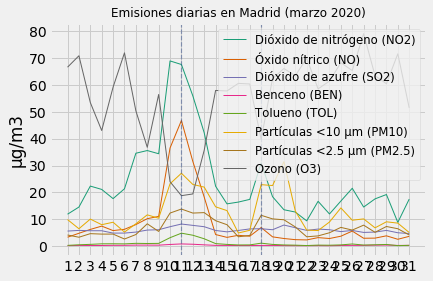

In [231]:
ax = emissions_march_2020_graph.plot(colormap='Dark2', linewidth= 1)
ax.set_title('Emisiones diarias en Madrid (marzo 2020)', fontsize=12)
plt.axvline(x=11,linestyle='dashed', alpha=0.5, color = '#334f8d', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', alpha=0.5, color = '#334f8d', linewidth=1.2)
plt.legend(loc='best', fontsize='small')
plt.ylabel("µg/m3")
plt.xlabel("")
plt.xticks(list(range(1,32)))
plt.yticks(list(range(0,90, 10)))
pass;

# 5.2. NO2 emissions in March and april 2020

In [43]:
# Emissions in March 2020
emissions_march_april_2020 = df_avg_emissions[(df_avg_emissions.index.month >= 3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [44]:
# NO2 emissions in March 2020
emissions_march_april_2020 = pd.DataFrame(emissions_march_april_2020.groupby
                                    ([emissions_march_april_2020.index.month,
                                      emissions_march_april_2020.index.day])['no2'].mean())

In [45]:
emissions_march_april_2020.index = emissions_march_april_2020.index.droplevel()


In [46]:
emissions_march_april_2020.reset_index(inplace=True)

In [47]:
emissions_march_april_2020

,date,no2
0,1,11.904762
1,2,14.571429
2,3,22.380952
3,4,21.142857
4,5,17.714286
...,...,...
56,26,6.428571
57,27,9.714286
58,28,10.952381
59,29,13.000000


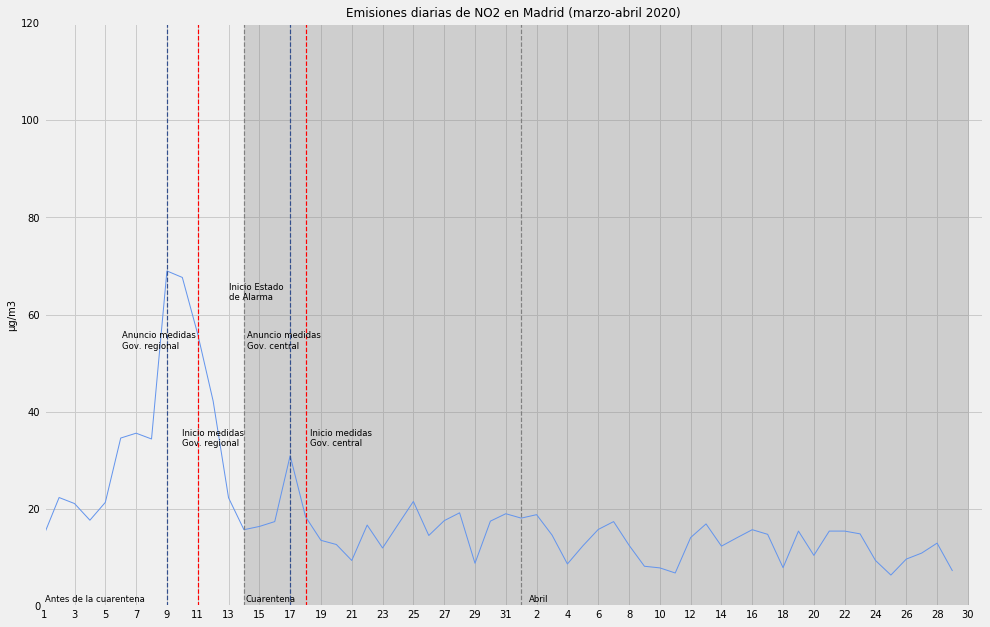

In [48]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=emissions_march_april_2020.index, y="no2",
                  data=emissions_march_april_2020, color = 'cornflowerblue', linewidth=1.0)

plt.title('Emisiones diarias de NO2 en Madrid (marzo-abril 2020)', fontsize = 12)

plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)
plt.xticks(np.arange(1,70, 2),['1','3','5','7','9','11','13','15','17','19',
                               '21','23','25','27','29','31','2','4','6','8','10',
                              '12','14','16','18','20','22','24','26','28','30'], fontsize=10)
plt.yticks(list(range(0,121, 20)),fontsize=10)
plt.ylim(0)
plt.xlim(1, 62)


ax.axvspan(xmin=14, xmax=61, color='grey', alpha=0.3)

plt.axvline(x=9,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', color = 'red', linewidth=1.2)
plt.axvline(x=14,linestyle='dashed', color = 'grey', linewidth=1.2)
plt.axvline(x=17,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', color = 'red', linewidth=1.2)
plt.axvline(x=32,linestyle='dashed', color = 'grey', linewidth=1.2)


plt.text(x=6.1, y=53, s='Anuncio medidas\nGov. regional', color='black', fontsize=8.5)
plt.text(x=10, y=33, s='Inicio medidas\nGov. regional', color='black', fontsize=8.5)
plt.text(x=13, y=63, s='Inicio Estado\nde Alarma', color='black', fontsize=8.5)
plt.text(x=14.17, y=53, s='Anuncio medidas\nGov. central', color='black', fontsize=8.5)
plt.text(x=18.3, y=33, s='Inicio medidas\nGov. central', color='black', fontsize=8.5)
plt.text(1.1, 1,'Antes de la cuarentena', color='black', fontsize=8.5)
plt.text(14.1, 1,'Cuarentena', color='black', fontsize=8.5)
plt.text(32.5, 1,'Abril', color='black', fontsize=8.5)

plt.savefig('no2_marzo.pdf', bbox_inches='tight')
pass;

#### 5.2. NO2 emissions in March 2020

In [165]:
# Emissions in March 2020
emissions_march_2020 = df_avg_emissions[(df_avg_emissions.index.month ==3) 
                                        & (df_avg_emissions.index.year ==2020)]


In [166]:
# NO2 emissions in March 2020
emissions_march_2020_no2 = pd.DataFrame(emissions_march_2020.groupby
                                    (emissions_march_2020.index.day)['no2'].mean())

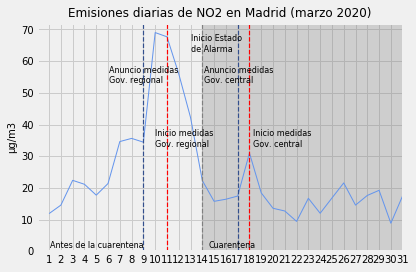

In [210]:
ax = sns.lineplot(x=emissions_march_2020_no2.index, y="no2",
                  data=emissions_march_2020_no2, color = 'cornflowerblue', linewidth=1.0)

plt.title('Emisiones diarias de NO2 en Madrid (marzo 2020)', fontsize = 12)

plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)
plt.xticks(list(range(1,32)), fontsize=10)
plt.yticks(list(range(0,80, 10)), fontsize=10)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=31)

ax.axvspan(xmin=14, xmax=31, color='grey', alpha=0.3)

plt.axvline(x=9,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=11,linestyle='dashed', color = 'red', linewidth=1.2)
plt.axvline(x=14,linestyle='dashed', color = 'grey', linewidth=1.2)
plt.axvline(x=17,linestyle='dashed', color = '#334f8d', linewidth=1.2)
plt.axvline(x=18,linestyle='dashed', color = 'red', linewidth=1.2)

plt.text(x=6.1, y=53, s='Anuncio medidas\nGov. regional', color='black', fontsize=8)
plt.text(x=10, y=33, s='Inicio medidas\nGov. regional', color='black', fontsize=8)
plt.text(x=13, y=63, s='Inicio Estado\nde Alarma', color='black', fontsize=8)
plt.text(x=14.17, y=53, s='Anuncio medidas\nGov. central', color='black', fontsize=8)
plt.text(x=18.3, y=33, s='Inicio medidas\nGov. central', color='black', fontsize=8)
plt.text(1.1, 1,'Antes de la cuarentena', color='black', fontsize=8)
plt.text(14.5, 1,'Cuarentena', color='black', fontsize=8)

plt.tight_layout()


plt.savefig('no2_marzo.pdf', bbox_inches='tight')
pass;

In [168]:
# Emissions in first and second half of March 2020
emissions_march_2020_1_14 = df_avg_emissions[(df_avg_emissions.index.month ==3) 
                                        & (df_avg_emissions.index.year ==2020)
                                        & (df_avg_emissions.index.day <= 14)]

emissions_march_2020_15_31 = df_avg_emissions[(df_avg_emissions.index.month ==3) 
                                        & (df_avg_emissions.index.year ==2020)
                                        & (df_avg_emissions.index.day > 14)]

In [169]:
# mean no2 emissions march 2020
emissions_march_2020['no2'].mean()

24.21505376344086

In [170]:
# NO2 average emissions in first and second half of March 2020
emissions_march_2020_1_14_mean= emissions_march_2020_1_14['no2'].mean()
emissions_march_2020_15_31_mean= emissions_march_2020_15_31['no2'].mean()

print('Emissions first half:', emissions_march_2020_1_14_mean, '\tEmissions second half:', emissions_march_2020_15_31_mean)

Emissions first half: 33.642857142857146 	Emissions second half: 16.45098039215686


In [171]:
# Calculate percentage difference between second 15 days and first in March 2020
((emissions_march_2020_1_14_mean- emissions_march_2020_15_31_mean) / emissions_march_2020_1_14_mean) *100

51.10111985346156

#### 5.3. NO2 emissions in March 2020 and March in the last 10 years

In [172]:
# Calculate monthly no2 emissions 
monthly_no2_emissions =df_avg_emissions[['no2']].resample(rule='M').mean()

In [173]:
# Calculate monthly no2 emissions in 2020
monthly_no2_emissions_2020= monthly_no2_emissions[monthly_no2_emissions.index.year ==2020]

In [174]:
# Calculate monthly no2 emissions before 2020
monthly_no2_emissions_before_2020= monthly_no2_emissions[monthly_no2_emissions.index.year < 2020]

In [175]:
# Group by month to get no2 emissions average per month
monthly_no2_emissions_before_2020_per_month = (monthly_no2_emissions_before_2020
                                                .groupby(monthly_no2_emissions_before_2020.index.month)
                                                .mean())

In [176]:
monthly_no2_emissions_2020= monthly_no2_emissions_2020.groupby(monthly_no2_emissions_2020.index.month).mean()

In [177]:
comparison = monthly_no2_emissions_before_2020_per_month.merge(monthly_no2_emissions_2020, how='outer', on ='date')

comparison.columns = ['Media histórica', 'Emisiones en 2020']

In [178]:
comparison

,Media histórica,Emisiones en 2020
date,,
1,52.948407,48.609321
2,46.314774,47.283624
3,39.367569,24.215054
4,32.612842,12.845599
5,30.274209,NaN
6,30.674038,NaN
7,32.226145,NaN
8,29.681342,NaN
9,40.764791,NaN


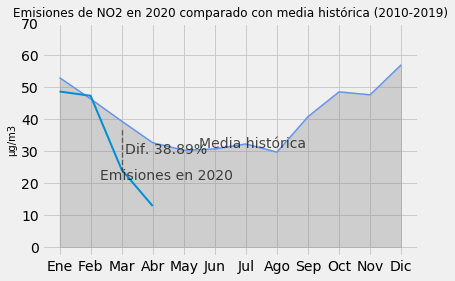

In [208]:
ax1=comparison['Media histórica'].plot(linewidth=1.5, color = 'cornflowerblue')
ax2=comparison['Emisiones en 2020'].plot(linewidth=2, color = 'C0')

plt.title('Emisiones de NO2 en 2020 comparado con media histórica (2010-2019)', fontsize = 12)
plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)
plt.xticks(range(1,13), ['Ene',"Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.text(x=2.3, y=21, s='Emisiones en 2020', alpha=0.7, color='black')
plt.text(x=5.5, y=31, s='Media histórica', alpha=0.7, color='black')
plt.text(x=3.1, y=29, s='Dif. 38.89%', alpha=0.7, color='black')
plt.axvline(x=3, ymin=0.36, ymax=0.55, linestyle='dashed', alpha=0.5, color = 'black', linewidth=1.4)
plt.fill_between(range(1,13), comparison['Media histórica'], alpha = 0.3, color='grey')
plt.yticks(list(range(0,80, 10)))
pass;

In [180]:
# Calculate average difference (%)
print('Diferencia de emisiones marzo:', ((39.367569 - 24.215054) /39.367569 )*100, '%')

Diferencia de emisiones: 38.48984172733654 %


In [ ]:
32.612842	12.845599

In [319]:
print('Diferencia de emisiones abril:', ((32.612842 - 12.845599) /32.612842 )*100, '%')

Diferencia de emisiones: 60.611838121927555 %


In [181]:
weekly_no2_emissions =df_avg_emissions[['no2']].resample(rule='W').mean()

In [182]:
# Calculate monthly no2 emissions in 2020
weekly_no2_emissions_2020= weekly_no2_emissions[(weekly_no2_emissions.index.year ==2020)
                                               & (weekly_no2_emissions.index.month <5)]

In [183]:
# Calculate monthly no2 emissions before 2020
weekly_no2_emissions_before_2020= weekly_no2_emissions[weekly_no2_emissions.index.year < 2020]

In [184]:
# Group by month to get no2 emissions average per month
weekly_no2_emissions_before_2020_per_week = (weekly_no2_emissions_before_2020
                                                .groupby(weekly_no2_emissions_before_2020.index.week) 
                                                .mean())

In [185]:
weekly_no2_emissions_2020= weekly_no2_emissions_2020.groupby(weekly_no2_emissions_2020.index.week).mean()

In [186]:
comparison3 = weekly_no2_emissions_before_2020_per_week.merge(weekly_no2_emissions_2020, how='outer', on ='date')

comparison3.columns = ['Media histórica', 'Emisiones en 2020']

In [187]:
comparison3

,Media histórica,Emisiones en 2020
date,,
1,53.607756,61.531231
2,60.932397,67.128942
3,51.963620,54.932282
4,49.298639,32.034014
5,47.957548,27.084941
6,45.197464,50.389610
7,44.890383,48.119048
8,48.380458,54.935683
9,42.690900,36.820965


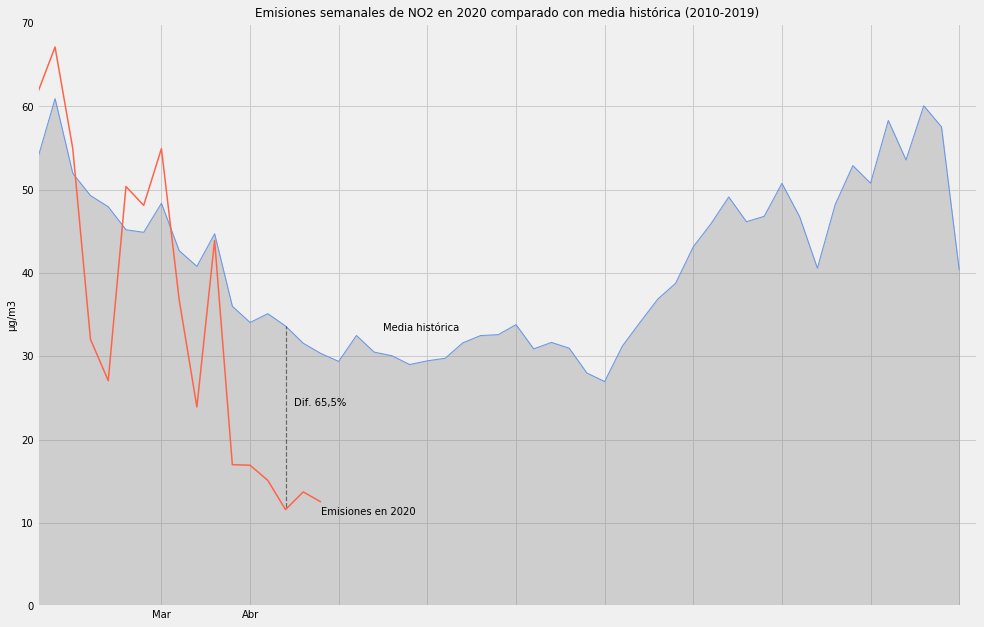

In [320]:
plt.figure(figsize=(15,10))

ax1=comparison3['Media histórica'].plot(linewidth=1, color = 'cornflowerblue')
ax2=comparison3['Emisiones en 2020'].plot(linewidth=1.5, color = 'tomato')

plt.title('Emisiones semanales de NO2 en 2020 comparado con media histórica (2010-2019)', fontsize = 12)

plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)

plt.xticks(range(8,54, 5), ['Mar', 'Abr'], fontsize=10)
plt.yticks(list(range(0,80, 10)), fontsize=10)

ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=1,xmax=54)

plt.text(x=17, y=11, s='Emisiones en 2020', color='black', fontsize=10)
plt.text(x=20.5, y=33, s='Media histórica', color='black', fontsize=10)
plt.text(x=15.5, y=24, s='Dif. 65,5%', color='black', fontsize=10)

plt.axvline(x=15, ymin= 0.17, ymax= 0.48, linestyle='dashed', alpha=0.5, color = 'black', linewidth=1.2)

plt.fill_between(range(1,54), comparison3['Media histórica'], alpha = 0.3, color='grey')

plt.savefig('emisiones_his.pdf', bbox_inches='tight')
pass;

In [318]:
((33.644493	 -11.605442)/33.644493	) * 100


65.50567131447039

In [190]:
((34.066698- 16.931973)/34.066698) *100

50.29758093960266

### Without seasoniality

In [191]:
monthly_no2_emissions_ns = monthly_no2_emissions.rolling(window=3, win_type='gaussian').mean(std=2)

In [192]:
monthly_no2_emissions_ns = monthly_no2_emissions_ns.dropna()

In [193]:
# Calculate monthly no2 emissions in 2020
monthly_no2_emissions_2020_ns= monthly_no2_emissions_ns[monthly_no2_emissions_ns.index.year ==2020]

In [194]:
# Calculate monthly no2 emissions before 2020
monthly_no2_emissions_before_2020_ns= monthly_no2_emissions_ns[monthly_no2_emissions_ns.index.year < 2020]

In [195]:
# Group by month to get no2 emissions average per month
monthly_no2_emissions_before_2020_per_month_ns = (monthly_no2_emissions_before_2020_ns
                                                .groupby(monthly_no2_emissions_before_2020_ns.index.month)
                                                .mean())

In [196]:
monthly_no2_emissions_2020_ns= monthly_no2_emissions_2020_ns.groupby(monthly_no2_emissions_2020_ns.index.month).mean()

In [197]:
comparison2 = monthly_no2_emissions_before_2020_per_month_ns.merge(monthly_no2_emissions_2020_ns, 
                                                                   how='outer', on ='date')

comparison2.columns = ['Media histórica', 'Emisiones en 2020']

In [198]:
comparison2

,Media histórica,Emisiones en 2020
date,,
1,54.080337,40.158867
2,52.763748,46.263380
3,46.214692,40.344000
4,39.429002,27.949034
5,34.022317,NaN
6,31.148238,NaN
7,31.041808,NaN
8,30.918543,NaN
9,34.031041,NaN


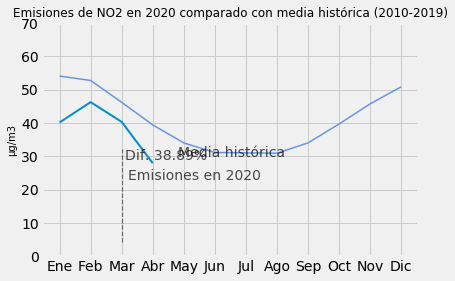

In [206]:
ax1=comparison2['Media histórica'].plot(linewidth=1.5, color = 'cornflowerblue')
ax2=comparison2['Emisiones en 2020'].plot(linewidth=2, color = 'C0')

plt.title('Emisiones de NO2 en 2020 comparado con media histórica (2010-2019)', fontsize = 12)
plt.xlabel('')
plt.ylabel('µg/m3', fontsize = 10)
plt.xticks(range(1,13), ['Ene',"Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.text(x=3.2, y=23, s='Emisiones en 2020', alpha=0.7, color='black')
plt.text(x=4.8, y=30, s='Media histórica', alpha=0.7, color='black')
plt.text(x=3.1, y=29, s='Dif. 38.89%', alpha=0.7, color='black')
plt.axvline(x=3, ymin=0.06, ymax=0.46, linestyle='dashed', alpha=0.5, color = 'black', linewidth=1.2)
plt.yticks(list(range(0,80, 10)))
pass;

#### 5.4. Days in period 2010-2020 with the lowest NO2 emissions 

In [321]:
# Two of the five days with lowest NO2 levels took places in March 2020.
min_daily_no2 = df_avg_emissions[['no2']].sort_values(by='no2')
min_daily_no2.head(10)

,no2
date,
2020-04-26,6.428571
2020-04-12,6.857143
2020-04-30,7.272727
2020-04-11,7.904762
2020-04-19,7.952381
2020-04-10,8.238095
2014-04-20,8.454545
2012-08-15,8.545455
2020-04-05,8.714286


In [322]:
df_avg_emissions['no2'].sort_values().head(10)

date
2020-04-26    6.428571
2020-04-12    6.857143
2020-04-30    7.272727
2020-04-11    7.904762
2020-04-19    7.952381
2020-04-10    8.238095
2014-04-20    8.454545
2012-08-15    8.545455
2020-04-05    8.714286
2020-03-30    8.857143
Name: no2, dtype: float64

#### 5.5. Months in period 2010-2020 with the lowest NO2 emissions 

In [323]:
# Group month period and sort
avg_no2_month = pd.DataFrame(df_avg_emissions.groupby
                             (df_avg_emissions.index.to_period('M'))
                             ['no2'].mean())

avg_no2_month_sorted = avg_no2_month[['no2']].sort_values(by='no2')

In [324]:
# March 2020 was the second cleanest month in the last 10 years
avg_no2_month_sorted.head(10)

,no2
date,
2020-04,12.845599
2019-05,23.502933
2020-03,24.215054
2014-08,24.347647
2013-06,25.138175
2019-06,25.972121
2014-05,26.001466
2013-08,26.401341
2013-05,26.673021


In [330]:
((23.502933- 12.845599)/23.502933) *100

45.344698042580475

In [329]:
# Calculate difference 
avg_no2_month_sorted.pct_change()

,no2
date,
2020-04,NaN
2019-05,0.829649
2020-03,0.030299
2014-08,0.005476
2013-06,0.032468
...,...
2014-12,0.015540
2011-02,0.031932
2017-11,0.011564


#### 5.6. How many stations suppassed the limit in previous March

In [205]:
# Calculate no2 emissions in march 
stations_emissions_march = df_stations_emissions[df_stations_emissions.index.month ==3]

stations_no2_march = stations_emissions_march[stations_emissions_march['particle'] == 'no2']

NameError: name 'df_stations_emissions' is not defined

In [234]:
# Calculate avg emissions in March 2010-2020
stations_avg_no2_march = stations_no2_march.groupby([stations_no2_march.index.year, 'station','name']).mean().reset_index()

In [235]:
stations_avg_no2_march

,date,station,name,measurement
0,2010,4,Pza. de España,50.333333
1,2010,8,Escuelas Aguirre,39.645161
2,2010,11,Avda. Ramón y Cajal,48.225806
3,2010,16,Arturo Soria,40.161290
4,2010,17,Villaverde,30.225806
...,...,...,...,...
257,2020,56,Pza. Elíptica,31.838710
258,2020,57,Sanchinarro,18.612903
259,2020,58,El Pardo,8.580645
260,2020,59,Juan Carlos I,16.193548


In [236]:
# Pivot to create a column per year
stations_avg_no2_march = pd.pivot(stations_avg_no2_march, 
                                  index= 'name', 
                                  columns='date',
                                  values='measurement')

In [237]:
stations_surpassed = []
for year in stations_avg_no2_march.columns:
    number = len(stations_avg_no2_march[stations_avg_no2_march[year] >= 40])
    stations_surpassed.append(number)
  

''

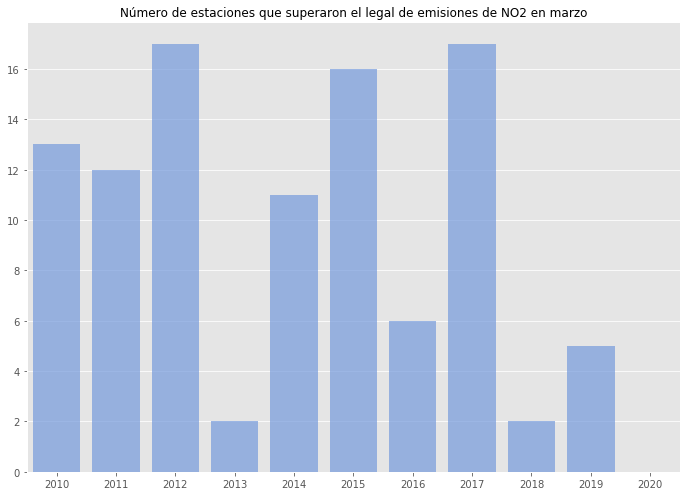

In [64]:
# Number of stations that surpassed the limit in March
plt.rcParams['figure.figsize'] = 11.7,8.27
ax = sns.barplot(x=stations_avg_no2_march.columns, y=stations_surpassed,
                 alpha = 0.70, color=('cornflowerblue'))
plt.title('Número de estaciones que superaron el legal de emisiones de NO2 en marzo', fontsize = 12)
plt.xlabel('', fontsize = 10)
plt.ylabel('', fontsize = 10)
;